In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn
import pandas as pd

from sklearn.impute import SimpleImputer #para quitar NAN con promedios
from sklearn.preprocessing import OneHotEncoder #cuando tengo informacion cualitativa la transfomo en valores 0 y 1
from sklearn.compose import ColumnTransformer  #me deja empaquetar trnasformaciones
from sklearn.compose import make_column_selector  # me permite seleccionar columnas no por nombre, si no por caracteritcias
#ejemplo: que sean sus valores "float"

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import Normalizer
from scipy.special import gamma
from scipy.optimize import minimize
from numpy.random import seed

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate, train_test_split

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 13

In [3]:
#RESUMEN:
#EL ORDEN DEBE DE SER:
#1) SELECCIONAR MI X Y Y TRAIN Y TEST
#2) CREAR MI CONJUNTO DE TRANFOMRACIONES A MI INFORMACION CON UN COLUMN TRANSFORMER
#3) CREAR UN PIPE QUE CONTENGA LAS COLUMNAS VIA EL COLUMN TRANSFORMER MAS EL MODELO QUE QUIERO APLICARLE
#4) APLICAR UN CROSS VALIDATE O UN GRIDSEARCH SOBRE EL PIPE DE 2)
#5) SI EN 4) APLICASTE GRIDSEARCH Y CONSIGUES UN BEST ESTIMATOR (MEJOR MODELO), APLICO EL BEST ESTIMATOR SOBRE UN CROSS VALIDATION

In [5]:
housing = pd.read_csv("./final-project-predict-home-value/files/house-prices-advanced-regression-techniques/train.csv")  #importo mi informacion

In [6]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

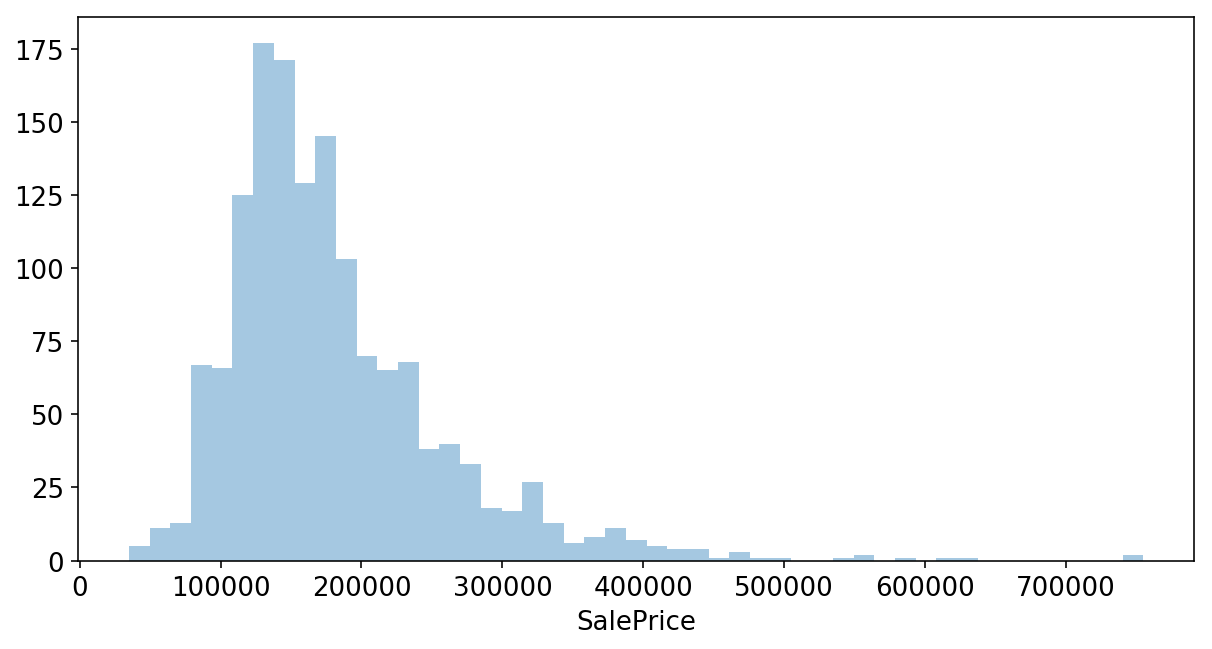

In [9]:
sns.distplot(housing.SalePrice, kde=False)

In [10]:
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718) #primero divido toda la info en train y test
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] #determino quien es X y quien y train

In [11]:
xtrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
760,761,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Shed,450,10,2009,WD,Normal
962,963,160,RL,24.0,2308,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand
1286,1287,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1024,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,COD,Abnorml
1330,1331,20,RL,85.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal
811,812,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,ConLD,Normal
289,290,70,RL,60.0,8730,Pave,NaN,Reg,Lvl,AllPub,...,259,0,NaN,NaN,NaN,0,7,2007,WD,Normal
443,444,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,New,Partial
689,690,120,RL,61.0,7577,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [12]:
ytrain

760     127500
962     155000
954     127500
1286    143000
1024    287000
1330    227000
811     144500
289     153575
443     172500
689     194700
310     165600
1022     87000
116     139000
868     169000
902     180000
244     205000
739     190000
1184    186700
869     236000
693     108480
578     146000
195     148500
249     277000
595     319000
1025    112500
179     100000
1335    167900
1136    119000
1319    111000
89      123600
         ...  
150     122000
576     145000
261     276000
616     183200
93      133900
494      91300
1243    465000
1202    117000
771     102000
213     156000
669     137500
355     177500
1135    102000
1232    101800
169     228000
171     215000
1325     55000
574     139000
1043    262280
613     147000
356     173000
827     189000
784     128000
1123    118000
146     105000
750      96500
389     426000
148     141000
1049     84900
1396    160000
Name: SalePrice, Length: 1168, dtype: int64

In [13]:
#Aplicando un modelo Linear Regression
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718) #primero divido toda la info en train y test
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] #determino quien es X y quien y train

#2)
column_selector = ColumnTransformer(  #esto es para agrupar varias transformaciones en una instruccion , el orden es 
    #nombre de la trnaformacion que yo le ponga, transformacion a aplicar, y el nombre de las columnas donde se aplica
    #la transofmracion o en su defecto el tipo de columnas via un make_column_selector
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]), #para creae una matriz de 0 y 1
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), #para quitar NAN con promedios
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), #mis x's tiene media 0 y varianza 1
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), #mis x's van de 0 a 1
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)#creo el pipeline con el modelo a utilizar
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("linmodel",LinearRegression())
])

#4)
#aplico cross validate
cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"]) 
r2_lin = cv["test_r2"]
mae_lin = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
#gsearch = GridSearchCV(estimator=pipe,
                       #param_grid={'lasso__alpha': [0.1 * 10 ** (i/2) for i in range(1, 11)]},
                       #scoring="neg_mean_absolute_error", 
                       #return_train_score=True, 
                       #cv=10)
#gsearch.fit(xtrain, ytrain) #le meto mi info al modelo de gsearch

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5)aplico cv sobre el mejor modelo de gsearch
#cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_lin.mean():0.2f}")
print(f"mean mae: {mae_lin.mean():,.2f}")

mean r2: 0.79
mean mae: 22,235.54


In [14]:
#Aplicando un modelo Lasso
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3) creo el pipeline con el modelo a utilizar
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("lasso", Lasso(alpha=.1, tol=0.5, random_state=314))
])

#4)
#aplico cross validate
#cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
gsearch = GridSearchCV(estimator=pipe,
                       param_grid={'lasso__alpha': [0.1 * 10 ** (i/2) for i in range(1, 11)],
                                   'lasso__tol':[0.0001, 0.001, 0.1, 1]},
                       scoring="neg_mean_absolute_error", 
                       return_train_score=True, 
                       cv=5)
gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5)aplico cv sobre el mejor modelo de gsearch
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2_lasso = cv["test_r2"]
mae_lasso = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_lasso.mean():0.2f}")
print(f"mean mae: {mae_lasso.mean():,.2f}")

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491414873912.293, tolerance: 578102265.4735652
  positive)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455811106444.42145, tolerance: 596964929.4500496
  positive)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490187023200.40405, tolerance: 623784111.0517945
  positive)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: O

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531655471514.6598, tolerance: 578102265.4735652
  positive)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519254677509.7604, tolerance: 596964929.4500496
  positive)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535862149569.3908, tolerance: 623784111.0517945
  positive)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Ob

mean r2: 0.79
mean mae: 21,670.44


In [15]:
#Aplicando un modelo Ridge
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)creo el pipeline con el modelo a utilizar
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("ridge", Ridge(alpha=1, solver = "cholesky", random_state=314)) 
])

#4)
#aplico cross validate
#cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
gsearch = GridSearchCV(estimator=pipe,
                       param_grid={'ridge__alpha': [0.1 * 10 ** (i/2) for i in range(1, 11)],
                                  'ridge__tol':[0.0001, 0.001, 0.1, 1]},
                       scoring="neg_mean_absolute_error", 
                       return_train_score=True, 
                       cv=5)
gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5)aplico cv sobre el mejor modelo de gsearch
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2_ridge = cv["test_r2"]
mae_ridge = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_ridge.mean():0.2f}")
print(f"mean mae: {mae_ridge.mean():,.2f}")

mean r2: 0.78
mean mae: 21,967.15


In [16]:
#Aplicando un modelo de Decision Tree
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)creo el pipeline con el modelo a utilizar
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("tree", DecisionTreeRegressor(criterion= "mae",max_depth = 2, random_state=314)) 
])

#4)
#aplico cross validate
#cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
gsearch = GridSearchCV(estimator=pipe,
                       param_grid={'tree__max_depth':[2,3,4,5]},
                       scoring="neg_mean_absolute_error", 
                       return_train_score=True, 
                       cv=5)
gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5)aplico cv sobre el mejor modelo de gsearch
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2_dt = cv["test_r2"]
mae_dt = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_dt.mean():0.2f}")
print(f"mean mae: {mae_dt.mean():,.2f}")

mean r2: 0.72
mean mae: 26,653.21


In [17]:
#Aplicando un modelo de SVR Lineal
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)creo el pipeline con el modelo a utilizar
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("svr", LinearSVR(epsilon =1.5, C=1, tol =.0001, random_state=314)) 
])

#4)
#aplico cross validate
#cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
gsearch = GridSearchCV(estimator=pipe,
                       param_grid={'svr__epsilon':[0,1,1.5,2],
                                  'svr__C' : [1,20,50,100],
                                  'svr__tol': [.001, .01, .1, 1]},
                       scoring="neg_mean_absolute_error", 
                       return_train_score=True, 
                       cv=5)
gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5)aplico cv sobre el mejor modelo de gsearch
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2_svrl = cv["test_r2"]
mae_svrl = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_svrl.mean():0.2f}")
print(f"mean mae: {mae_svrl.mean():,.2f}")

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: C

mean r2: 0.69
mean mae: 27,326.38


/Users/sergio.delacruz/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
#Aplicando un modelo de SVR No Lineal
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)creo el pipeline con el modelo a utilizar
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("svrp", SVR(kernel="poly", degree=2, C=100, epsilon=0.1)) 
])

#4)
#aplico cross validate
#cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
gsearch = GridSearchCV(estimator=pipe,
                       param_grid={'svrp__epsilon':[0,1,1.5,2],
                                   'svrp__degree' :[2,3],
                                   'svrp__C': [1,20,50,100],
                                   'svrp__tol': [.001, .01, .1, 1]},
                       scoring="neg_mean_absolute_error", 
                       return_train_score=True, 
                       cv=5)
gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5) aplico cv sobre el mejor modelo de gsearch
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2_svr = cv["test_r2"]
mae_svr = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_svr.mean():0.2f}")
print(f"mean mae: {mae_svr.mean():,.2f}")

mean r2: -0.03
mean mae: 55,241.42


In [19]:
#Aplicando un modelo de Voting
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=2, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)creo el pipeline con el modelo a utilizar
m1 = LinearRegression()
m2 = RandomForestRegressor(n_estimators=20, random_state=314,criterion='mae',max_depth=5) #estimators 10
m3 = DecisionTreeRegressor(criterion= "mae",max_depth = 5, random_state=314) #max depth 2
m4 = LinearSVR(epsilon =2, C=5, tol =.0001, random_state=314) #epsilo 1.5, c 1
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("vr", VotingRegressor([('lr', m1),('rf', m2),('dt', m3),('sv', m4)], weights=None, n_jobs=-1)) 
])

#4)
#aplico cross validate
cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
r2_v = cv["test_r2"]
mae_v = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
#gsearch = GridSearchCV(estimator=pipe,
#                       param_grid={'vr__weights':[0,1]},
#                       scoring="neg_mean_absolute_error", 
#                       return_train_score=True, 
#                       cv=5)
#gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5) aplico cv sobre el mejor modelo de gsearch
#cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_v.mean():0.2f}")
print(f"mean mae: {mae_v.mean():,.2f}")

mean r2: 0.82
mean mae: 19,546.72


In [20]:
#Aplicando un modelo de Boosting
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)creo el pipeline con el modelo a utilizar
n1 = LinearRegression()
n2 = RandomForestRegressor(n_estimators=20, random_state=314,criterion='mae',max_depth=5) #estimators 10
n3 = DecisionTreeRegressor(criterion= "mae",max_depth = 50, random_state=314) #max depth 2
n4 = LinearSVR(epsilon =2, C=5, tol =.0001, random_state=314) #epsilo 1.5, c 1
pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("br", BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=314)) 
])

#4)
#aplico cross validate
#cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
gsearch = GridSearchCV(estimator=pipe,
                       param_grid={'br__base_estimator':[n1,n2,n3,n4]},
                       scoring="neg_mean_absolute_error", 
                       return_train_score=True, 
                       cv=5)
gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5) aplico cv sobre el mejor modelo de gsearch
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2_b = cv[

SyntaxError: unexpected EOF while parsing (<ipython-input-20-787dcbbe8d5f>, line 62)

In [ ]:
#Aplicando un modelo de RandomForest
#1)
#Determino mi X y y, asi como los train y test sets
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"] 

#2)
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition","LotConfig","BldgType"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include=["float","integer"])), 
     ("scaler", StandardScaler(),make_column_selector(dtype_include="integer")), 
     ("normalizer",Normalizer(),make_column_selector(dtype_include="integer")), 
     #("poly_features", PolynomialFeatures(degree=3, include_bias=False),make_column_selector(dtype_include="integer")) #el false me dice que no meta interceptos
])


#3)creo el pipeline con el modelo a utilizar

pipe = Pipeline([ 
    ("select_cols", column_selector), 
    ("rf",  RandomForestRegressor(max_depth=None, criterion='mae',n_jobs=-1,random_state=314)) 
])

#4)
#aplico cross validate
#cv = cross_validate(pipe, xtrain, ytrain, cv=10, scoring=["r2", "neg_mean_absolute_error"]) 
#r2 = cv["test_r2"]
#mae = -cv["test_neg_mean_absolute_error"]

#4')
#aplico el gsearch
gsearch = GridSearchCV(estimator=pipe,
                       param_grid={'rf__max_depth':[2,4,5,10,20,50,100]},
                       scoring="neg_mean_absolute_error", 
                       return_train_score=True, 
                       cv=5)
gsearch.fit(xtrain, ytrain)

#print("--------------------------------------------------------------------------------")
#print(gsearch.cv_results_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_estimator_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_score_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_params_) 
#print("--------------------------------------------------------------------------------")
#print(gsearch.best_index_) 
#print("--------------------------------------------------------------------------------")
#print(cvres['param_lasso__alpha'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_train_score'])
#print("--------------------------------------------------------------------------------")
#print(cvres['mean_test_score'])
#print("--------------------------------------------------------------------------------")

#5) aplico cv sobre el mejor modelo de gsearch
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2_rf2 = cv["test_r2"]
mae_rf2 = -cv["test_neg_mean_absolute_error"]

print(f"mean r2: {r2_rf2.mean():0.2f}")
print(f"mean mae: {mae_rf2.mean():,.2f}")

In [ ]:
#Se puede apreciar que el modelo que maximizo la r2 y minimizo el mae es el random forest